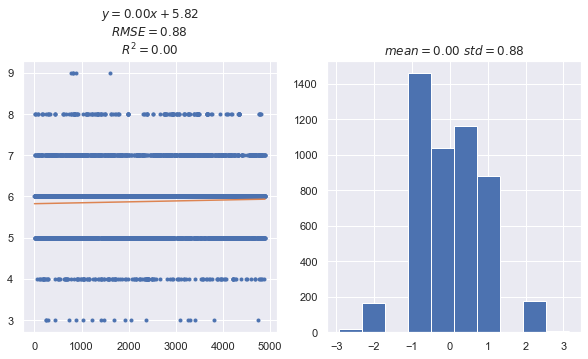

In [2]:
from sklearn.linear_model import LinearRegression, LogisticRegression
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd

white = pd.read_csv("winequality-white.csv",sep=';')
red = pd.read_csv("winequality-white.csv",sep=';')

x = np.linspace(0,4898,4898)
y = white.quality
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.plot(x,white.quality,'o',markersize=3)

X = x.reshape(-1,1)
lr = LinearRegression()
lr_fit = lr.fit(X,y)

y_pred = lr_fit.predict(X)
error = y - y_pred
sse = np.sum(error**2)
rmse = np.sqrt(sse/len(y))
sst = np.sum((y-np.mean(y))**2)
r2 = 1 - sse/sst

ax.plot(x,y_pred,'-')
ax.set_title(f"$y={lr_fit.coef_[0]:.2f}x+{lr_fit.intercept_:.2f}$\n$RMSE={rmse:.2f}$\n$R^2={r2:.2f}$")
ax2 = fig.add_subplot(122)
ax2.hist(error);
ax2.set_title(f"$mean={np.mean(error):.2f}\ std={np.std(error):.2f}$");

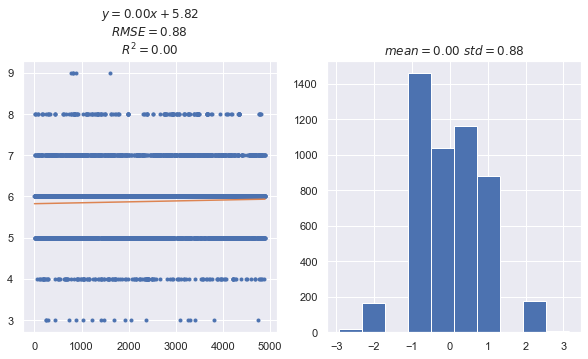

In [3]:
x = np.linspace(0,4898,4898)
z = red.quality
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.plot(x,z,'o',markersize=3)

X = x.reshape(-1,1)
lr = LinearRegression()
lr_fit = lr.fit(X,z)

z_pred = lr_fit.predict(X)
error = z - z_pred
sse = np.sum(error**2)
rmse = np.sqrt(sse/len(z))
sst = np.sum((z-np.mean(z))**2)
r2 = 1 - sse/sst

ax.plot(x,z_pred,'-')
ax.set_title(f"$y={lr_fit.coef_[0]:.2f}x+{lr_fit.intercept_:.2f}$\n$RMSE={rmse:.2f}$\n$R^2={r2:.2f}$")
ax2 = fig.add_subplot(122)
ax2.hist(error);
ax2.set_title(f"$mean={np.mean(error):.2f}\ std={np.std(error):.2f}$");

In [4]:
#Combining DataFrames

df = white.quality
df1 = pd.DataFrame(df)
df2 = red.quality
df3 = pd.DataFrame(df2)
DF = df1.join(df3, on='quality', how='left', lsuffix='_white', rsuffix='_red')
DF

,quality_white,quality_red
0,6,6
1,6,6
2,6,6
3,6,6
4,6,6
...,...,...
4893,6,6
4894,5,6
4895,6,6
4896,7,6


TypeError: unsupported format string passed to numpy.ndarray.__format__

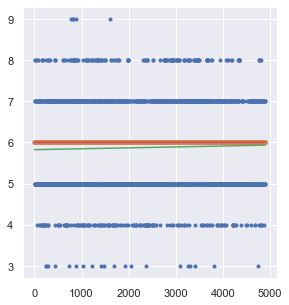

In [5]:
x = np.linspace(0,4898,4898)
z = DF
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.plot(x,z,'o',markersize=3)

X = x.reshape(-1,1)
lr = LinearRegression()
lr_fit = lr.fit(X,z)

z_pred = lr_fit.predict(X)
error = z - z_pred
sse = np.sum(error**2)
rmse = np.sqrt(sse/len(z))
sst = np.sum((z-np.mean(z))**2)
r2 = 1 - sse/sst

ax.plot(x,z_pred,'-')
ax.set_title(f"$y={lr_fit.coef_[0]:.2f}x+{lr_fit.intercept_:.2f}$\n$RMSE={rmse:.2f}$\n$R^2={r2:.2f}$")
ax2 = fig.add_subplot(122)
ax2.hist(error);
ax2.set_title(f"$mean={np.mean(error):.2f}\ std={np.std(error):.2f}$");

#I think I know why I get this error, but could not figure out a fix

In [6]:
df = pd.read_csv("haberman.data",sep=',',names=['Age','Year','Nodes','Survival'])

/Users/Kayvon/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[0.00092431]],[-1.16464833]


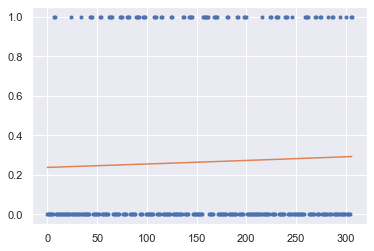

In [7]:
x1 = np.linspace(0,306,306)
y1 = df.Survival


y2 = pd.DataFrame(y1)
y3 = y2.replace(1,0) #changing value of 2 to 1 and value of 1 to 0
y3 = y3.replace(2,1) #so the regression line will be in between
plt.plot(x1,y3,'o',markersize=3)

logreg = LogisticRegression(solver='lbfgs')
logreg.fit(x1.reshape(-1,1),y3)
print(str(logreg.coef_) + ',' + str(logreg.intercept_))
x = np.linspace(0,306,306)
y = 1 / (1 + np.exp(-(logreg.coef_[0]*x+logreg.intercept_)))
plt.plot(x,y);

#Not sure what this is either, but it's not an "error" exactly